In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [1]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as np
import pandas as pd
from VIGA_METALICA_VERIFICA import *
from FINITO_FEM_TOOLBOX import *
from FUNDACAO_VERIFICA import *
from datetime import datetime

In [ ]:
#NOS BARRAS
ELEMENTO_ANALISADO_1 = [2,5]
ELEMENTO_ANALISADO_2 = [6,9]
ELEMENTO_ANALISADO_3 = [10,13]
ELEMENTO_ANALISADO_4 = [14,17]
ELEMENTO_ANALISADO_5 = [18,21]

#150 X 18,0
P1 = ['NORMAL', 200E9, 12E9] #E MPa      6%         
P2 = ['NORMAL', 250E6, 15E6] #Fy MPa   6%      

P3 = ['NORMAL', 13766.18, 1376.618] #FQ N     10%
P10 = ['NORMAL', 2306.981, 922.7924] #FL N     40%

P4 = ['NORMAL', 1, 0.03] #Incerteza de Modelo 1 adimensional 3%
P5 = ['NORMAL', 1, 0.03] #Incerteza de Modelo 2 adimensional 3%
P6 = ['NORMAL', 139, 6.95] #H_W mm 5%
P7 = ['NORMAL', 5.8, 0.29] #T_W mm 5%
P8 = ['NORMAL', 102, 5.1] #B_F mm 5%
P9 = ['NORMAL', 7.1, 0.355] #T_F mm 5%

POP = [100000]

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

#carta_total = carga G + carga Q

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 15,
        'D': 10 , #variables
        'VARS': [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10],
        'MODEL': 'MCS'}

In [ ]:
def OBJ(X):
    
    E = X[0]
    FY = X[1]
    
    F1 = X[2]
    F2 = X[9]
    
    S1 = X[3]
    S2 = X[4]
    H_W = X[5]
    T_W = X[6]
    B_F = X[7]
    T_F = X[8]
       
    M_SD_1G = []
    M_SD_2G = []
    M_SD_3G = []
    M_SD_4G = []
    M_SD_5G = []
    
    V_SD_1G = []
    V_SD_2G = []
    V_SD_3G = []
    V_SD_4G = []
    V_SD_5G = []
    
    N_SD_1G = []
    N_SD_2G = []
    N_SD_3G = []
    N_SD_4G = []
    N_SD_5G = []
                    
    D_SD_1G = []
    D_SD_2G = []
    D_SD_3G = []
    D_SD_4G = []
    D_SD_5G = []
           
    M_SD_1Q = []
    M_SD_2Q = []
    M_SD_3Q = []
    M_SD_4Q = []
    M_SD_5Q = []
    
    V_SD_1Q = []
    V_SD_2Q = []
    V_SD_3Q = []
    V_SD_4Q = []
    V_SD_5Q = []
    
    N_SD_1Q = []
    N_SD_2Q = []
    N_SD_3Q = []
    N_SD_4Q = []
    N_SD_5Q = []
                    
    D_SD_1Q = []
    D_SD_2Q = []
    D_SD_3Q = []
    D_SD_4Q = []
    D_SD_5Q = []
    
    L_MAX = []

    # auxiliares para tranformar em metroX
    ALFA = 0.001 #mm para m
    BETA = 0.000001 #cm3 para m3
    GAMMA = 0.00000001 #cm4 para m4
    
    #coenficientes EL
    COEF_G1 = 1 #1.25
    COEF_G2 = 1 #1.5
    COEF_Q1 = 1 #0.3
    COEF_Q2 = 1 #1

    INERCIA = INERCIA_CALCULO(B_F, T_F, H_W, T_W)
    Z = MODULO_PLASTICO(B_F, T_F, H_W, T_W)
    
    VIGA = {'H_W': H_W * ALFA, #m           
        'T_W': T_W * ALFA, #m
        'B_F': B_F * ALFA, #m
        'T_F': T_F * ALFA, #m
        'PARAMETRO_PERFIL': 'DUPLA SIMETRIA', #"DUPLA SIMETRIA, MONO SIMETRIA "
        'TIPO_PERFIL': 'LAMINADO', #"SOLDADO, LAMINADO "
        'GAMMA_A1': 1,
        'Z': Z, #m3
        'INERCIA': INERCIA, #m4   
        'E_S': E , #Pa 
        'F_Y': FY, #N
        'S1': S1, #adm
        'S2': S2} #adm
    
    AREA = 2 * (VIGA['T_F'] * VIGA['B_F']) + (VIGA['T_W'] * VIGA['H_W']) #m2
    H = (2 * VIGA['T_F']) + VIGA['H_W'] #m
    X_GC =  VIGA['B_F'] / 2 #m
    Y_GC = (( VIGA['T_F'] * 2) + VIGA['H_W']) / 2 #m

    FRAME_00 = {
                "TYPE_ELEMENT": 0,
                "TYPE_SOLUTION": 0,
                "N_NODES": 22,
                "N_MATERIALS": 1,
                "N_SECTIONS": 1,
                "N_ELEMENTS": 25,
                "N_DOFPRESCRIPTIONS": 6,
                "N_DOFLOADED": 20,
                "N_DOFSPRINGS": 0,
                "COORDINATES": #X,Y
                np.array([
                [0.0,0.0],
                [5.25,0.0],
                [0.0,3.0],
                [1.75,3.0],
                [3.5,3.0],
                [5.25,3.0],
                [0.0,6.0],
                [1.75,6.0],
                [3.5,6.0],
                [5.25,6.0],
                [0.0,9.0],
                [1.75,9.0],
                [3.50,9.0],
                [5.25,9.0],
                [0.0,12.0],
                [1.75,12.0],
                [3.50,12.0],
                [5.25,12.0],
                [0.0,15.0],
                [1.75,15.0],
                [3.5,15.0],
                [5.25,15.0]]),

                "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
                np.array([
                [0,2,0,0,0,0],
                [1,5,0,0,0,0],
                [2,3,0,0,0,0],
                [3,4,0,0,0,0],
                [4,5,0,0,0,0],
                [2,6,0,0,0,0],
                [5,9,0,0,0,0],
                [6,7,0,0,0,0],
                [7,8,0,0,0,0],
                [8,9,0,0,0,0],
                [6,10,0,0,0,0],
                [9,13,0,0,0,0],
                [10,11,0,0,0,0],
                [11,12,0,0,0,0],
                [12,13,0,0,0,0],
                [10,14,0,0,0,0],
                [13,17,0,0,0,0],
                [14,15,0,0,0,0],
                [15,16,0,0,0,0],
                [16,17,0,0,0,0],
                [14,18,0,0,0,0],
                [17,21,0,0,0,0],
                [18,19,0,0,0,0],
                [19,20,0,0,0,0],
                [20,21,0,0,0,0]]),

                "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
                np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
                "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
                np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, Y_GC]]),
                #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
                "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [0,0,0],
                [0,1,0],
                [0,2,0],
                [1,0,0],
                [1,1,0],
                [1,2,0]]),
                "ELEMENT LOADS": None,
                "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [2,1,-F1,0],
                [3,1,-F1,0],
                [4,1,-F1,0],
                [5,1,-F1,0],
                [6,1,-F1,0],
                [7,1,-F1,0],
                [8,1,-F1,0],
                [9,1,-F1,0],
                [10,1,-F1,0],
                [11,1,-F1,0],
                [12,1,-F1,0],
                [13,1,-F1,0],
                [14,1,-F1,0],
                [15,1,-F1,0],
                [16,1,-F1,0],
                [17,1,-F1,0],
                [18,1,-F1,0],
                [19,1,-F1,0],
                [20,1,-F1,0],
                [21,1,-F1,0]]),
                "SPRINGS": None}    

    FRAME_00_RESULTS = MEF1D(DICTIONARY = FRAME_00)  
    
    #02
    FRAME_01 = {
                "TYPE_ELEMENT": 0,
                "TYPE_SOLUTION": 0,
                "N_NODES": 22,
                "N_MATERIALS": 1,
                "N_SECTIONS": 1,
                "N_ELEMENTS": 25,
                "N_DOFPRESCRIPTIONS": 6,
                "N_DOFLOADED": 20,
                "N_DOFSPRINGS": 0,
                "COORDINATES": #X,Y
                np.array([
                [0.0,0.0],
                [5.25,0.0],
                [0.0,3.0],
                [1.75,3.0],
                [3.5,3.0],
                [5.25,3.0],
                [0.0,6.0],
                [1.75,6.0],
                [3.5,6.0],
                [5.25,6.0],
                [0.0,9.0],
                [1.75,9.0],
                [3.50,9.0],
                [5.25,9.0],
                [0.0,12.0],
                [1.75,12.0],
                [3.50,12.0],
                [5.25,12.0],
                [0.0,15.0],
                [1.75,15.0],
                [3.5,15.0],
                [5.25,15.0]]),

                "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
                np.array([
                [0,2,0,0,0,0],
                [1,5,0,0,0,0],
                [2,3,0,0,0,0],
                [3,4,0,0,0,0],
                [4,5,0,0,0,0],
                [2,6,0,0,0,0],
                [5,9,0,0,0,0],
                [6,7,0,0,0,0],
                [7,8,0,0,0,0],
                [8,9,0,0,0,0],
                [6,10,0,0,0,0],
                [9,13,0,0,0,0],
                [10,11,0,0,0,0],
                [11,12,0,0,0,0],
                [12,13,0,0,0,0],
                [10,14,0,0,0,0],
                [13,17,0,0,0,0],
                [14,15,0,0,0,0],
                [15,16,0,0,0,0],
                [16,17,0,0,0,0],
                [14,18,0,0,0,0],
                [17,21,0,0,0,0],
                [18,19,0,0,0,0],
                [19,20,0,0,0,0],
                [20,21,0,0,0,0]]),

                "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
                np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
                "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
                np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, X_GC]]),
                #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
                "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [0,0,0],
                [0,1,0],
                [0,2,0],
                [1,0,0],
                [1,1,0],
                [1,2,0]]),
                "ELEMENT LOADS": None,
                "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [2,1,-F2,0],
                [3,1,-F2,0],
                [4,1,-F2,0],
                [5,1,-F2,0],
                [6,1,-F2,0],
                [7,1,-F2,0],
                [8,1,-F2,0],
                [9,1,-F2,0],
                [10,1,-F2,0],
                [11,1,-F2,0],
                [12,1,-F2,0],
                [13,1,-F2,0],
                [14,1,-F2,0],
                [15,1,-F2,0],
                [16,1,-F2,0],
                [17,1,-F2,0],
                [18,1,-F2,0],
                [19,1,-F2,0],
                [20,1,-F2,0],
                [21,1,-F2,0]]),
                "SPRINGS": None}    

    FRAME_01_RESULTS = MEF1D(DICTIONARY = FRAME_01)
    
    CARGA_PILAR_11 = abs((FRAME_00_RESULTS[0]['N'][0]))
    CARGA_PILAR_12 = abs((FRAME_01_RESULTS[0]['N'][0]))
    
    CARGA_PILAR_21 = abs((FRAME_00_RESULTS[1]['N'][0]))
    CARGA_PILAR_22 = abs((FRAME_01_RESULTS[1]['N'][0]))
    
    SOLO_1 = {'TIPO_SOLO' : 'Silte Argiloso', 
           'NSPT' : 7,  
           'CARGA_PILAR' : CARGA_PILAR_11 + CARGA_PILAR_12, # N  
           'BASE_PILAR' : VIGA['B_F']*100, #cm  *100 para converter de m para cm
           'LARGURA_PILAR' : H*100 } #cm  *100 para converter de m para cm
          
    SOLO_2 = {'TIPO_SOLO' : 'Areia Siltosa',
           'NSPT' : 10,
           'CARGA_PILAR' : CARGA_PILAR_21 + CARGA_PILAR_22, # N 
           'BASE_PILAR' : VIGA['B_F'] * 100, #cm  *100 para converter de m para cm
           'LARGURA_PILAR' : H * 100 } #cm  *100 para converter de m para cm    
                  
    KV1 = CALCULO_KV(SOLO_1) # N/m2
    KV2 = CALCULO_KV(SOLO_2) # N/m2
    
    #03
    FRAME_02 = {
                "TYPE_ELEMENT": 0,
                "TYPE_SOLUTION": 0,
                "N_NODES": 22,
                "N_MATERIALS": 1,
                "N_SECTIONS": 1,
                "N_ELEMENTS": 25,
                "N_DOFPRESCRIPTIONS": 4,
                "N_DOFLOADED": 20,
                "N_DOFSPRINGS": 2,
                "COORDINATES": #X,Y
                np.array([
                [0.0,0.0],
                [5.25,0.0],
                [0.0,3.0],
                [1.75,3.0],
                [3.5,3.0],
                [5.25,3.0],
                [0.0,6.0],
                [1.75,6.0],
                [3.5,6.0],
                [5.25,6.0],
                [0.0,9.0],
                [1.75,9.0],
                [3.50,9.0],
                [5.25,9.0],
                [0.0,12.0],
                [1.75,12.0],
                [3.50,12.0],
                [5.25,12.0],
                [0.0,15.0],
                [1.75,15.0],
                [3.5,15.0],
                [5.25,15.0]]),

                "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
                np.array([
                [0,2,0,0,0,0],
                [1,5,0,0,0,0],
                [2,3,0,0,0,0],
                [3,4,0,0,0,0],
                [4,5,0,0,0,0],
                [2,6,0,0,0,0],
                [5,9,0,0,0,0],
                [6,7,0,0,0,0],
                [7,8,0,0,0,0],
                [8,9,0,0,0,0],
                [6,10,0,0,0,0],
                [9,13,0,0,0,0],
                [10,11,0,0,0,0],
                [11,12,0,0,0,0],
                [12,13,0,0,0,0],
                [10,14,0,0,0,0],
                [13,17,0,0,0,0],
                [14,15,0,0,0,0],
                [15,16,0,0,0,0],
                [16,17,0,0,0,0],
                [14,18,0,0,0,0],
                [17,21,0,0,0,0],
                [18,19,0,0,0,0],
                [19,20,0,0,0,0],
                [20,21,0,0,0,0]]),

        "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
        np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
        "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
        np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, Y_GC]]),
        #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
        "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,0,0],
        #[0,1,0],
        [0,2,0],
        [1,0,0],
        #[1,1,0],
        [1,2,0]]),
        "ELEMENT LOADS": None,
        "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                        np.array([
                [2,1,-F1,0],
                [3,1,-F1,0],
                [4,1,-F1,0],
                [5,1,-F1,0],
                [6,1,-F1,0],
                [7,1,-F1,0],
                [8,1,-F1,0],
                [9,1,-F1,0],
                [10,1,-F1,0],
                [11,1,-F1,0],
                [12,1,-F1,0],
                [13,1,-F1,0],
                [14,1,-F1,0],
                [15,1,-F1,0],
                [16,1,-F1,0],
                [17,1,-F1,0],
                [18,1,-F1,0],
                [19,1,-F1,0],
                [20,1,-F1,0],
                [21,1,-F1,0]]),
        "SPRINGS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,1,KV1,0],
        [1,1,KV2,0]])}
    
    FRAME_02_RESULTS = MEF1D(DICTIONARY = FRAME_02)
    
    #04
    FRAME_03 = {
                "TYPE_ELEMENT": 0,
                "TYPE_SOLUTION": 0,
                "N_NODES": 22,
                "N_MATERIALS": 1,
                "N_SECTIONS": 1,
                "N_ELEMENTS": 25,
                "N_DOFPRESCRIPTIONS": 4,
                "N_DOFLOADED": 20,
                "N_DOFSPRINGS": 2,
                "COORDINATES": #X,Y
                np.array([
                [0.0,0.0],
                [5.25,0.0],
                [0.0,3.0],
                [1.75,3.0],
                [3.5,3.0],
                [5.25,3.0],
                [0.0,6.0],
                [1.75,6.0],
                [3.5,6.0],
                [5.25,6.0],
                [0.0,9.0],
                [1.75,9.0],
                [3.50,9.0],
                [5.25,9.0],
                [0.0,12.0],
                [1.75,12.0],
                [3.50,12.0],
                [5.25,12.0],
                [0.0,15.0],
                [1.75,15.0],
                [3.5,15.0],
                [5.25,15.0]]),

                "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
                np.array([
                [0,2,0,0,0,0],
                [1,5,0,0,0,0],
                [2,3,0,0,0,0],
                [3,4,0,0,0,0],
                [4,5,0,0,0,0],
                [2,6,0,0,0,0],
                [5,9,0,0,0,0],
                [6,7,0,0,0,0],
                [7,8,0,0,0,0],
                [8,9,0,0,0,0],
                [6,10,0,0,0,0],
                [9,13,0,0,0,0],
                [10,11,0,0,0,0],
                [11,12,0,0,0,0],
                [12,13,0,0,0,0],
                [10,14,0,0,0,0],
                [13,17,0,0,0,0],
                [14,15,0,0,0,0],
                [15,16,0,0,0,0],
                [16,17,0,0,0,0],
                [14,18,0,0,0,0],
                [17,21,0,0,0,0],
                [18,19,0,0,0,0],
                [19,20,0,0,0,0],
                [20,21,0,0,0,0]]),

        "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
        np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
        "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
        np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, Y_GC]]),
        #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
        "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,0,0],
        #[0,1,0],
        [0,2,0],
        [1,0,0],
        #[1,1,0],
        [1,2,0]]),
        "ELEMENT LOADS": None,
        "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                        np.array([
                [2,1,-F2,0],
                [3,1,-F2,0],
                [4,1,-F2,0],
                [5,1,-F2,0],
                [6,1,-F2,0],
                [7,1,-F2,0],
                [8,1,-F2,0],
                [9,1,-F2,0],
                [10,1,-F2,0],
                [11,1,-F2,0],
                [12,1,-F2,0],
                [13,1,-F2,0],
                [14,1,-F2,0],
                [15,1,-F2,0],
                [16,1,-F2,0],
                [17,1,-F2,0],
                [18,1,-F2,0],
                [19,1,-F2,0],
                [20,1,-F2,0],
                [21,1,-F2,0]]),
        "SPRINGS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,1,KV1,0],
        [1,1,KV2,0]])}
    
    FRAME_03_RESULTS = MEF1D(DICTIONARY = FRAME_03)
    
    ELEMENTO_1G = pd.DataFrame(FRAME_02_RESULTS[ELEMENTO_ANALISADO_1[0]:ELEMENTO_ANALISADO_1[1]])
    ELEMENTO_2G = pd.DataFrame(FRAME_02_RESULTS[ELEMENTO_ANALISADO_2[0]:ELEMENTO_ANALISADO_2[1]])
    ELEMENTO_3G = pd.DataFrame(FRAME_02_RESULTS[ELEMENTO_ANALISADO_3[0]:ELEMENTO_ANALISADO_3[1]])
    ELEMENTO_4G = pd.DataFrame(FRAME_02_RESULTS[ELEMENTO_ANALISADO_4[0]:ELEMENTO_ANALISADO_4[1]])
    ELEMENTO_5G = pd.DataFrame(FRAME_02_RESULTS[ELEMENTO_ANALISADO_5[0]:ELEMENTO_ANALISADO_5[1]])
    
    ELEMENTO_1Q = pd.DataFrame(FRAME_03_RESULTS[ELEMENTO_ANALISADO_1[0]:ELEMENTO_ANALISADO_1[1]])
    ELEMENTO_2Q = pd.DataFrame(FRAME_03_RESULTS[ELEMENTO_ANALISADO_2[0]:ELEMENTO_ANALISADO_2[1]])
    ELEMENTO_3Q = pd.DataFrame(FRAME_03_RESULTS[ELEMENTO_ANALISADO_3[0]:ELEMENTO_ANALISADO_3[1]])
    ELEMENTO_4Q = pd.DataFrame(FRAME_03_RESULTS[ELEMENTO_ANALISADO_4[0]:ELEMENTO_ANALISADO_4[1]])
    ELEMENTO_5Q = pd.DataFrame(FRAME_03_RESULTS[ELEMENTO_ANALISADO_5[0]:ELEMENTO_ANALISADO_5[1]])
      
    for i in range(len(ELEMENTO_1G)): 
        M_SD_1G.append(max(ELEMENTO_1G['M'][i].max(),abs(ELEMENTO_1G['M'][i].min())))
        M_SD_2G.append(max(ELEMENTO_2G['M'][i].max(),abs(ELEMENTO_2G['M'][i].min())))
        M_SD_3G.append(max(ELEMENTO_3G['M'][i].max(),abs(ELEMENTO_3G['M'][i].min())))
        M_SD_4G.append(max(ELEMENTO_4G['M'][i].max(),abs(ELEMENTO_4G['M'][i].min())))
        M_SD_5G.append(max(ELEMENTO_5G['M'][i].max(),abs(ELEMENTO_5G['M'][i].min())))
        
        M_SD_1Q.append(max(ELEMENTO_1Q['M'][i].max(),abs(ELEMENTO_1Q['M'][i].min())))
        M_SD_2Q.append(max(ELEMENTO_2Q['M'][i].max(),abs(ELEMENTO_2Q['M'][i].min())))
        M_SD_3Q.append(max(ELEMENTO_3Q['M'][i].max(),abs(ELEMENTO_3Q['M'][i].min())))
        M_SD_4Q.append(max(ELEMENTO_4Q['M'][i].max(),abs(ELEMENTO_4Q['M'][i].min())))
        M_SD_5Q.append(max(ELEMENTO_5Q['M'][i].max(),abs(ELEMENTO_5Q['M'][i].min())))
        
        V_SD_1G.append(max(ELEMENTO_1G['V'][i].max(),abs(ELEMENTO_1G['V'][i].min())))
        V_SD_2G.append(max(ELEMENTO_2G['V'][i].max(),abs(ELEMENTO_2G['V'][i].min())))
        V_SD_3G.append(max(ELEMENTO_3G['V'][i].max(),abs(ELEMENTO_3G['V'][i].min())))
        V_SD_4G.append(max(ELEMENTO_4G['V'][i].max(),abs(ELEMENTO_4G['V'][i].min())))
        V_SD_5G.append(max(ELEMENTO_5G['V'][i].max(),abs(ELEMENTO_5G['V'][i].min())))
        
        V_SD_1Q.append(max(ELEMENTO_1Q['V'][i].max(),abs(ELEMENTO_1Q['V'][i].min())))
        V_SD_2Q.append(max(ELEMENTO_2Q['V'][i].max(),abs(ELEMENTO_2Q['V'][i].min())))
        V_SD_3Q.append(max(ELEMENTO_3Q['V'][i].max(),abs(ELEMENTO_3Q['V'][i].min())))
        V_SD_4Q.append(max(ELEMENTO_4Q['V'][i].max(),abs(ELEMENTO_4Q['V'][i].min())))
        V_SD_5Q.append(max(ELEMENTO_5Q['V'][i].max(),abs(ELEMENTO_5Q['V'][i].min())))
        
        N_SD_1G.append(max(ELEMENTO_1G['N'][i].max(),abs(ELEMENTO_1G['N'][i].min())))
        N_SD_2G.append(max(ELEMENTO_2G['N'][i].max(),abs(ELEMENTO_2G['N'][i].min())))
        N_SD_3G.append(max(ELEMENTO_3G['N'][i].max(),abs(ELEMENTO_3G['N'][i].min())))
        N_SD_4G.append(max(ELEMENTO_4G['N'][i].max(),abs(ELEMENTO_4G['N'][i].min())))
        N_SD_5G.append(max(ELEMENTO_5G['N'][i].max(),abs(ELEMENTO_5G['N'][i].min())))
        
        N_SD_1Q.append(max(ELEMENTO_1Q['N'][i].max(),abs(ELEMENTO_1Q['N'][i].min())))
        N_SD_2Q.append(max(ELEMENTO_2Q['N'][i].max(),abs(ELEMENTO_2Q['N'][i].min())))
        N_SD_3Q.append(max(ELEMENTO_3Q['N'][i].max(),abs(ELEMENTO_3Q['N'][i].min())))
        N_SD_4Q.append(max(ELEMENTO_4Q['N'][i].max(),abs(ELEMENTO_4Q['N'][i].min())))
        N_SD_5Q.append(max(ELEMENTO_5Q['N'][i].max(),abs(ELEMENTO_5Q['N'][i].min())))

        D_SD_1G.append(max(abs(ELEMENTO_1G['UY'][i][ELEMENTO_1G['UY'][i]!=-1989].max()),abs(ELEMENTO_1G['UY'][i][ELEMENTO_1G['UY'][i]!=-1989].min())))
        D_SD_2G.append(max(abs(ELEMENTO_2G['UY'][i][ELEMENTO_2G['UY'][i]!=-1989].max()),abs(ELEMENTO_2G['UY'][i][ELEMENTO_2G['UY'][i]!=-1989].min())))
        D_SD_3G.append(max(abs(ELEMENTO_3G['UY'][i][ELEMENTO_3G['UY'][i]!=-1989].max()),abs(ELEMENTO_3G['UY'][i][ELEMENTO_3G['UY'][i]!=-1989].min())))
        D_SD_4G.append(max(abs(ELEMENTO_4G['UY'][i][ELEMENTO_4G['UY'][i]!=-1989].max()),abs(ELEMENTO_4G['UY'][i][ELEMENTO_4G['UY'][i]!=-1989].min())))
        D_SD_5G.append(max(abs(ELEMENTO_5G['UY'][i][ELEMENTO_5G['UY'][i]!=-1989].max()),abs(ELEMENTO_5G['UY'][i][ELEMENTO_5G['UY'][i]!=-1989].min())))
        
        D_SD_1Q.append(max(abs(ELEMENTO_1Q['UY'][i][ELEMENTO_1Q['UY'][i]!=-1989].max()),abs(ELEMENTO_1Q['UY'][i][ELEMENTO_1Q['UY'][i]!=-1989].min())))
        D_SD_2Q.append(max(abs(ELEMENTO_2Q['UY'][i][ELEMENTO_2Q['UY'][i]!=-1989].max()),abs(ELEMENTO_2Q['UY'][i][ELEMENTO_2Q['UY'][i]!=-1989].min())))
        D_SD_3Q.append(max(abs(ELEMENTO_3Q['UY'][i][ELEMENTO_3Q['UY'][i]!=-1989].max()),abs(ELEMENTO_3Q['UY'][i][ELEMENTO_3Q['UY'][i]!=-1989].min())))
        D_SD_4Q.append(max(abs(ELEMENTO_4Q['UY'][i][ELEMENTO_4Q['UY'][i]!=-1989].max()),abs(ELEMENTO_4Q['UY'][i][ELEMENTO_4Q['UY'][i]!=-1989].min())))
        D_SD_5Q.append(max(abs(ELEMENTO_5Q['UY'][i][ELEMENTO_5Q['UY'][i]!=-1989].max()),abs(ELEMENTO_5Q['UY'][i][ELEMENTO_5Q['UY'][i]!=-1989].min())))
      
        #L_MAX.append(ELEMENT['X'][i].max())
        
    M_SD_1G = max(M_SD_1G)
    V_SD_1G = max(V_SD_1G)
    N_SD_1G = max(N_SD_1G)
    D_SD_1G = max(D_SD_1G)   
    
    M_SD_2G = max(M_SD_2G)
    V_SD_2G = max(V_SD_2G)
    N_SD_2G = max(N_SD_2G)
    D_SD_2G = max(D_SD_2G)   
    
    M_SD_3G = max(M_SD_3G)
    V_SD_3G = max(V_SD_3G)
    N_SD_3G = max(N_SD_3G)
    D_SD_3G = max(D_SD_3G)   
    
    M_SD_4G = max(M_SD_4G)
    V_SD_4G = max(V_SD_4G)
    N_SD_4G = max(N_SD_4G)
    D_SD_4G = max(D_SD_4G)   
    
    M_SD_5G = max(M_SD_5G)
    V_SD_5G = max(V_SD_5G)
    N_SD_5G = max(N_SD_5G)
    D_SD_5G = max(D_SD_5G)  
    
    M_SD_1Q = max(M_SD_1Q)
    V_SD_1Q = max(V_SD_1Q)
    N_SD_1Q = max(N_SD_1Q)
    D_SD_1Q = max(D_SD_1Q)   
    
    M_SD_2Q = max(M_SD_2Q)
    V_SD_2Q = max(V_SD_2Q)
    N_SD_2Q = max(N_SD_2Q)
    D_SD_2Q = max(D_SD_2Q)   
    
    M_SD_3Q = max(M_SD_3Q)
    V_SD_3Q = max(V_SD_3Q)
    N_SD_3Q = max(N_SD_3Q)
    D_SD_3Q = max(D_SD_3Q)   
    
    M_SD_4Q = max(M_SD_4Q)
    V_SD_4Q = max(V_SD_4Q)
    N_SD_4Q = max(N_SD_4Q)
    D_SD_4Q = max(D_SD_4Q)   
    
    M_SD_5Q = max(M_SD_5Q)
    V_SD_5Q = max(V_SD_5Q)
    N_SD_5Q = max(N_SD_5Q)
    D_SD_5Q = max(D_SD_5Q)  
    
    L_MAX = FRAME_00['COORDINATES'][1][0]
              
    ESFORCOS_1 = {'M_SD': M_SD_1G + M_SD_1Q ,
                'V_SD': V_SD_1G + V_SD_1Q ,
                'D_SD': D_SD_1G + D_SD_1Q,
                'L_MAX': L_MAX}

    ESFORCOS_2 = {'M_SD': M_SD_2G * COEF_G1 + M_SD_2Q * COEF_G2,
                'V_SD': V_SD_2G * COEF_G1 + V_SD_2Q * COEF_G2,
                'D_SD': D_SD_2G * COEF_Q2 + D_SD_2Q * COEF_Q1,
                'L_MAX': L_MAX}

    ESFORCOS_3 = {'M_SD': M_SD_3G * COEF_G1 + M_SD_3Q * COEF_G2,
                'V_SD': V_SD_3G * COEF_G1 + V_SD_3Q * COEF_G2,
                'D_SD': D_SD_3G * COEF_Q2 + D_SD_3Q * COEF_Q1,
                'L_MAX': L_MAX}
    
    ESFORCOS_4 = {'M_SD': M_SD_4G * COEF_G1 + M_SD_4Q * COEF_G2,
                'V_SD': V_SD_4G * COEF_G1 + V_SD_4Q * COEF_G2,
                'D_SD': D_SD_4G * COEF_Q2 + D_SD_4Q * COEF_Q1,
                'L_MAX': L_MAX}

    ESFORCOS_5 = {'M_SD': M_SD_5G * COEF_G1 + M_SD_5Q * COEF_G2,
                'V_SD': V_SD_5G * COEF_G1 + V_SD_5Q * COEF_G2,
                'D_SD': D_SD_5G * COEF_Q2 + D_SD_5Q * COEF_Q1,
                'L_MAX': L_MAX}
    
    R_01, S_01 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS_1) 
    G_01 = -R_01 + S_01
    
    R_02, S_02 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS_2) 
    G_02 = -R_02 + S_02
    
    R_03, S_03 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS_3) 
    G_03 = -R_03 + S_03
    
    R_04, S_04 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS_4) 
    G_04 = -R_04 + S_04
    
    R_05, S_05 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS_5) 
    G_05= -R_05 + S_05
    

    R_11, S_11 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS_1)
    G_11 = - R_11 + S_11
    
    R_12, S_12 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS_2)
    G_12 = -R_12 + S_12
    
    R_13, S_13 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS_3)
    G_13 = -R_13 + S_13
    
    R_14, S_14= VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS_4)
    G_14 = -R_14 + S_14
    
    R_15, S_15= VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS_5)
    G_15 = -R_15 + S_15
    
    
    R_21, S_21 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS_1)
    G_21 = -R_21 + S_21
    
    R_22, S_22 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS_1)
    G_22 = -R_22 + S_22
    
    R_23, S_23 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS_1)
    G_23 = -R_23 + S_23
    
    R_24, S_24 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS_1)
    G_24 = -R_24 + S_24
    
    R_25, S_25 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS_1)
    G_25 = -R_25 + S_25
    
    
    R = [R_01, R_02, R_03, R_04, R_05, R_11, R_12, R_13, R_14, R_15, R_21, R_22, R_23, R_24, R_25] 
    S = [S_01, S_02, S_03, S_04, S_05, S_11, S_12, S_13, S_14, S_15, S_21, S_22, S_23, S_24, S_25] 
    G = [G_01, G_02, G_03, G_04, G_05, G_11, G_12, G_13, G_14, G_15, G_21, G_22, G_23, G_24, G_25] 
    
    return R, S, G

In [ ]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [77]:
DADOS = pd.read_csv('simulacoes/RASD SEM ISE.txt', sep=";") #importar dataframe

In [78]:
RESULTS_TEST[0]['TOTAL RESULTS']['R_0']

NameError: name 'RESULTS_TEST' is not defined

In [79]:
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

NameError: name 'RESULTS_TEST' is not defined

In [80]:
DADOS

,# X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,I_13,I_14
0,1.915141e+11,2.448562e+08,12962.47,1.03,1.01,150.83,5.77,107.75,7.34,4915.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.199164e+11,2.517933e+08,13231.48,1.05,0.96,133.58,6.30,97.60,7.37,3130.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.978545e+11,2.366609e+08,11110.57,1.04,1.04,142.46,5.39,104.14,7.22,4120.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.002808e+11,2.542166e+08,11226.54,0.95,0.99,135.23,5.80,106.93,6.42,3124.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.941784e+11,2.802641e+08,11017.53,0.97,0.96,144.24,5.91,104.99,6.40,3000.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.998561e+11,2.723167e+08,14626.19,1.01,0.99,140.86,6.10,101.74,6.85,1516.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,1.899402e+11,2.648395e+08,14334.94,1.06,0.98,144.40,6.09,98.60,7.13,2617.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,1.800053e+11,2.093888e+08,13283.84,1.01,1.03,131.91,5.74,110.09,6.52,1904.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,1.911589e+11,2.703887e+08,17570.58,0.99,0.96,138.22,5.20,94.75,6.97,2783.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
RESULTS_TEST[0]['TOTAL RESULTS']['S_5']

In [81]:
DADOS['S_2'].mean()

17002.85337330026

In [76]:
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
alfa = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

for c, v in enumerate(lista):
    II = 'I_'+str(v-1)
    print(II)
    DADOS = pd.read_csv('simulacoes/RASD SEM ISE.txt', sep=";") #importar dataframe
    P_FVALUE = DADOS[II].sum()/DADOS['I_0'].count()
    BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])
    BETA_VALUE = (BETA_DF['PF'].sub(P_FVALUE).abs().idxmin())/1000
    print(P_FVALUE)
    print(DADOS[II].sum())
    print(BETA_VALUE)
    print(" ")
    
    

I_0
1e-05
1.0
4.175
 
I_1
1e-05
1.0
4.175
 
I_2
1e-05
1.0
4.175
 
I_3
1e-05
1.0
4.175
 
I_4
1e-05
1.0
4.175
 
I_5
0.0
0.0
4.419
 
I_6
0.0
0.0
4.419
 
I_7
0.0
0.0
4.419
 
I_8
0.0
0.0
4.419
 
I_9
0.0
0.0
4.419
 
I_10
0.0
0.0
4.419
 
I_11
0.0
0.0
4.419
 
I_12
0.0
0.0
4.419
 
I_13
0.0
0.0
4.419
 
I_14
0.0
0.0
4.419
 


In [62]:
P_FVALUE

1e-05

In [74]:
DADOS['R_1']

0        27617.17
1        33720.57
2        28806.29
3        33210.08
4        32567.27
           ...   
99995    29265.05
99996    34033.41
99997    32594.45
99998    31271.39
99999    32881.38
Name: R_1, Length: 100000, dtype: float64

In [75]:
DADOS['S_1']

0        15140.25
1        18051.88
2        17067.70
3        13068.19
4        18614.10
           ...   
99995    19965.82
99996    13390.86
99997    13084.64
99998    14155.52
99999    15859.64
Name: S_1, Length: 100000, dtype: float64

In [ ]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS'] #USAR QUANDO HOUVEREM VARIAS SIMULACOES

In [ ]:
#Representação de histograma de frequência e boxplot da variável
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ (MPa)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

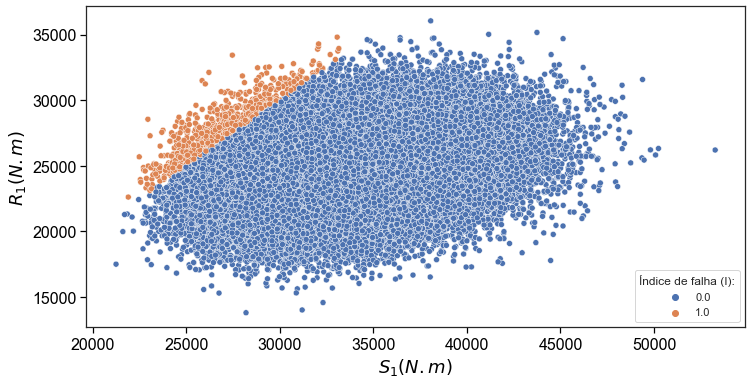

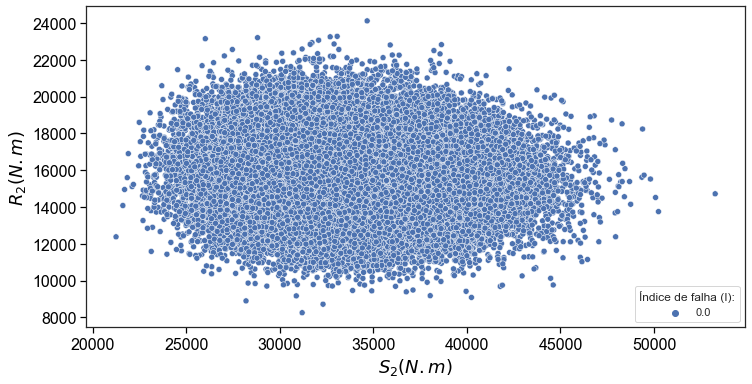

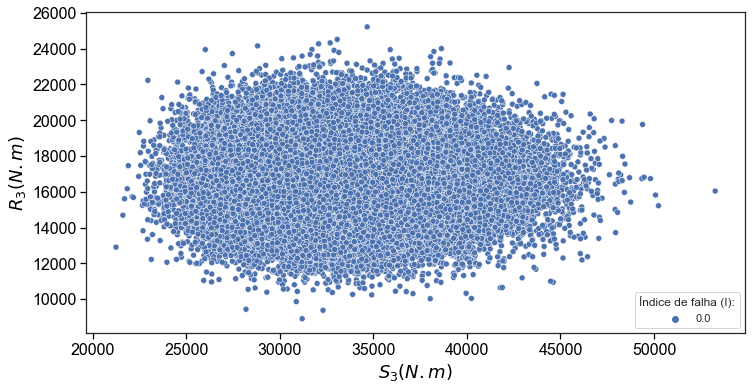

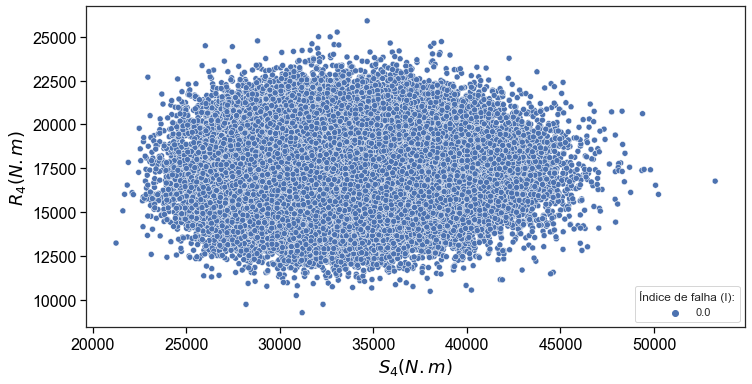

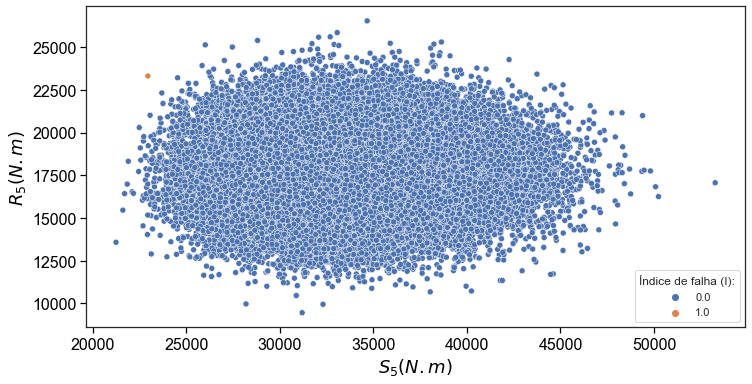

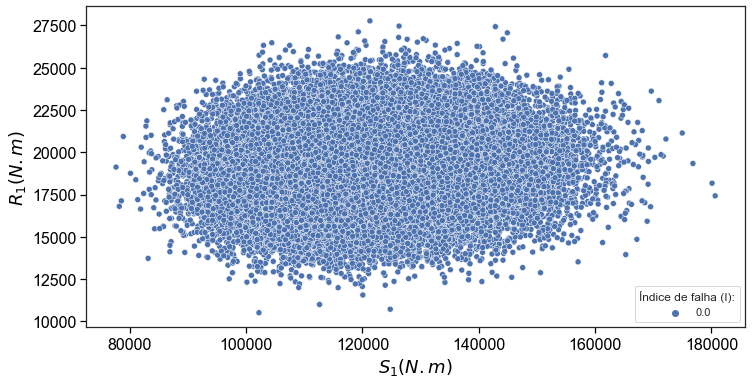

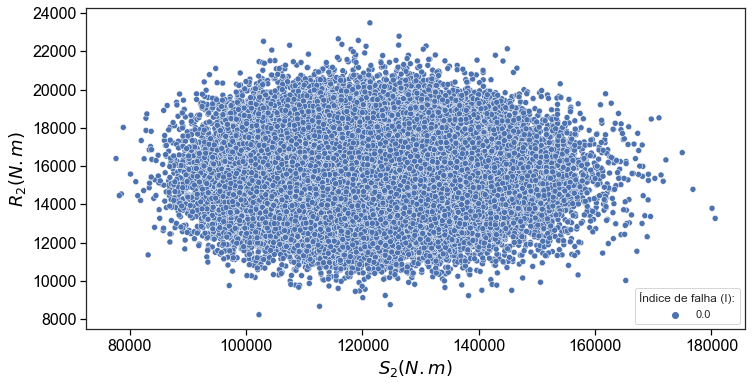

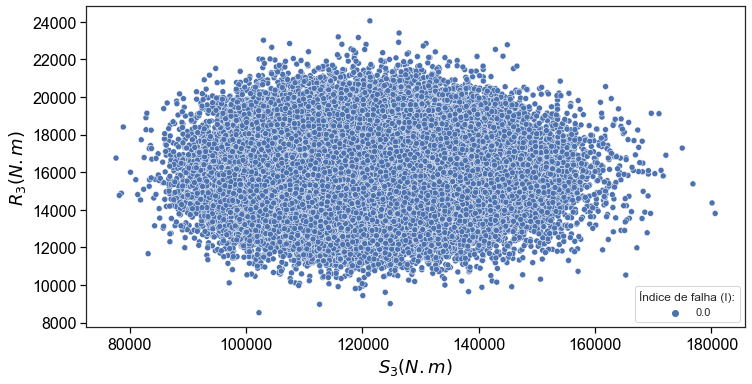

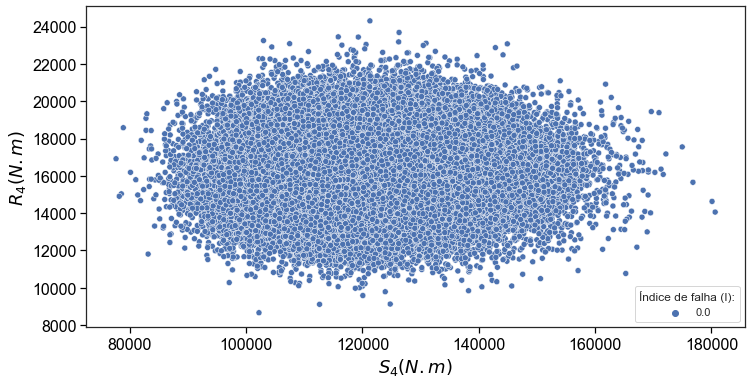

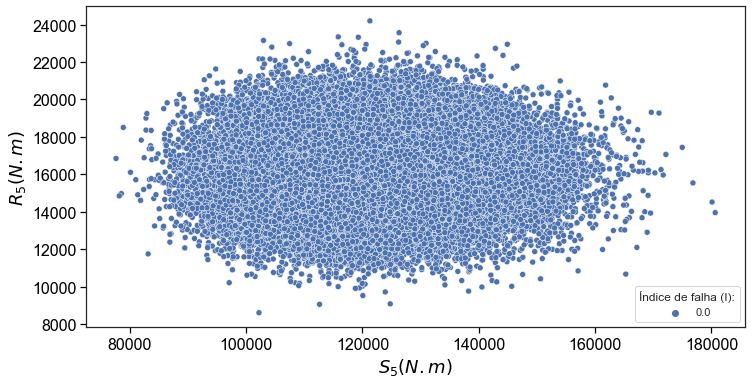

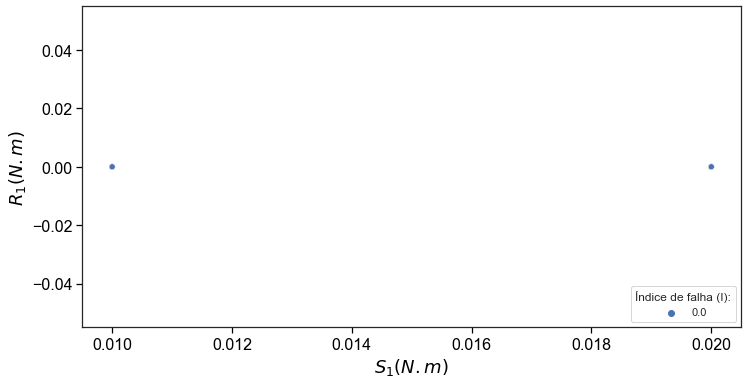

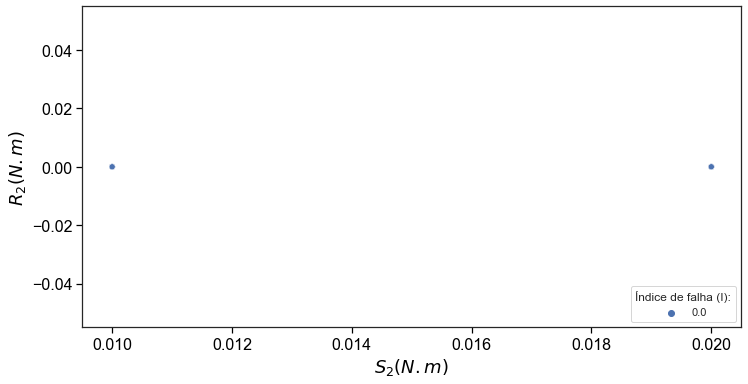

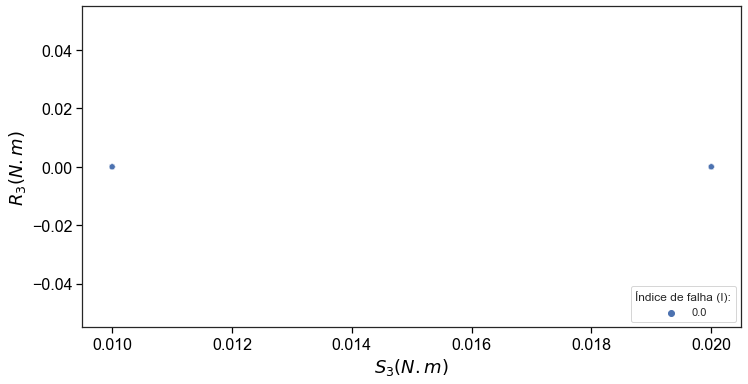

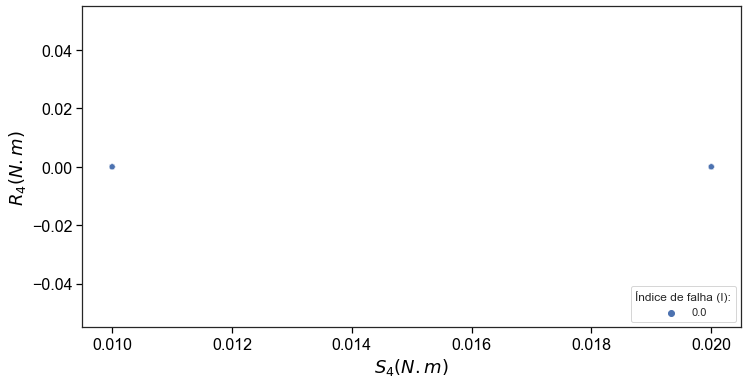

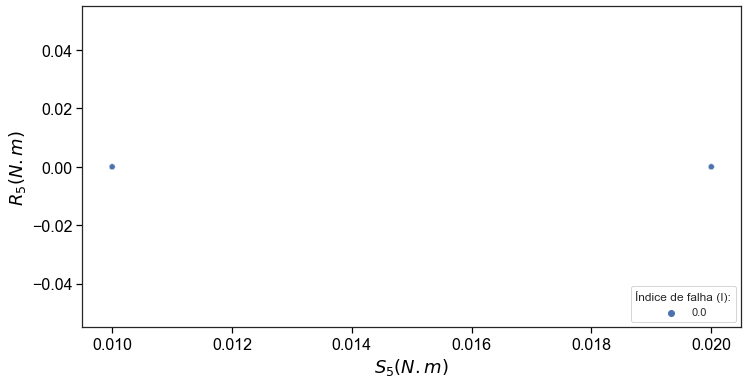

In [33]:
#Representação do gráfico de dispersão dos valores S_0, R_0  e índice de falha I.
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
alfa = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
for c, v in enumerate(lista):
    OPCOES_GRAFICAS = {'NAME': '5P COM ISE I_'+str(v-1)+' T2 - BARRA '+str(alfa[c])+'',
                    'EXTENSION': '.jpeg',
                    'DPI': 600,
                    'WIDTH': 0.300, 
                    'HEIGHT': 0.150,              
                    'X DATA': '$S_'+str(alfa[c])+'$',
                    'Y DATA': '$R_'+str(alfa[c])+'$',
                    'X AXIS SIZE': 16,
                    'Y AXIS SIZE': 16,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$S_'+str(alfa[c])+ '(N.m)$',
                    'Y AXIS LABEL': '$R_'+str(alfa[c])+ '(N.m)$',
                    'LABELS SIZE': 18,
                    'LABELS COLOR': '#000000',
                    'LOC LEGEND': 'lower right',
                    'TITLE LEGEND': 'Índice de falha (I):'}
    # RESULTS
    OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_'+str(v-1)+'', 'Y DATA': 'S_'+str(v-1)+'',  'HUE VALUE': 'I_'+str(v-1)+''}    
    # CALL PLOT
    RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

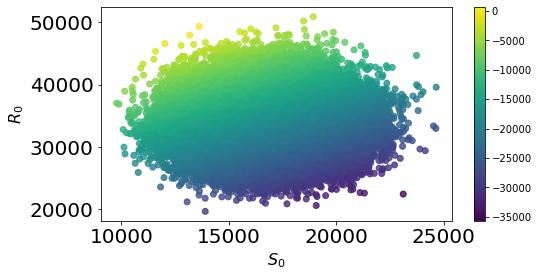

In [3]:
#Representação do gráfico de dispersão dos valores S_0 e R_0 com mapeamento de cores.
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

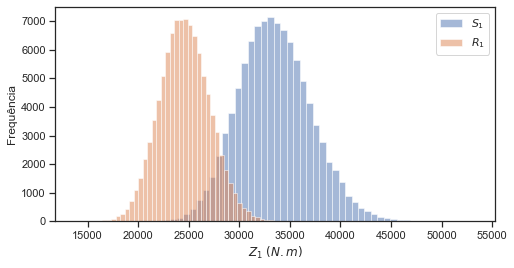

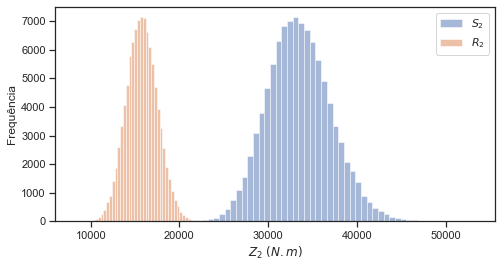

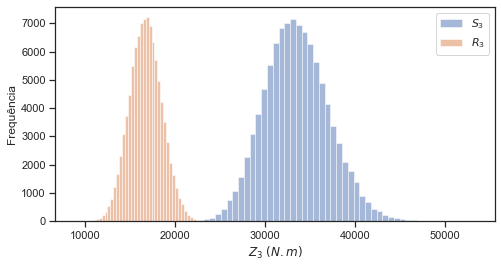

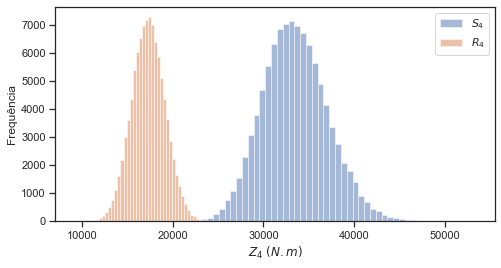

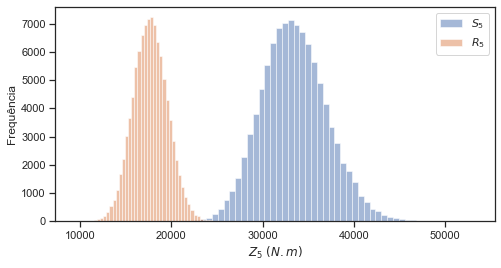

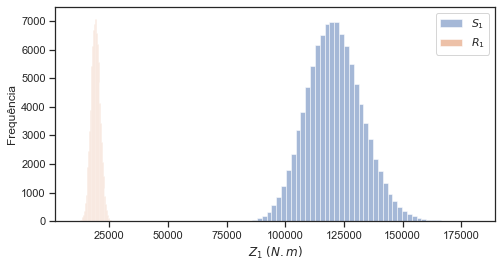

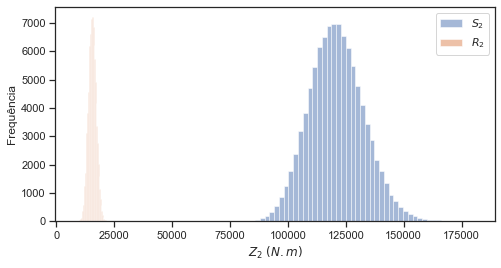

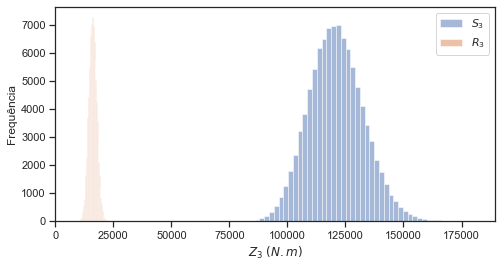

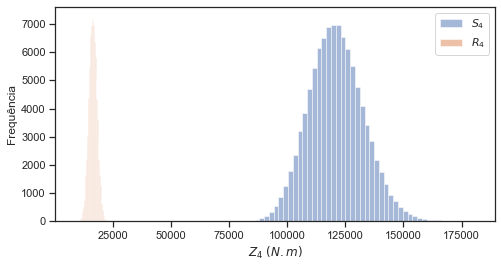

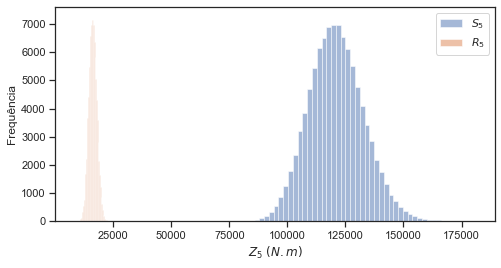

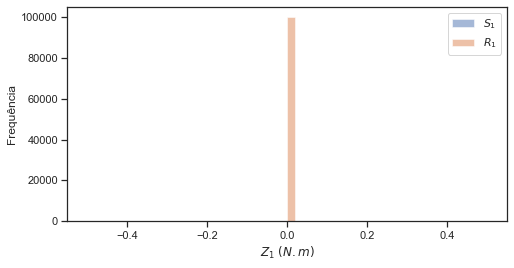

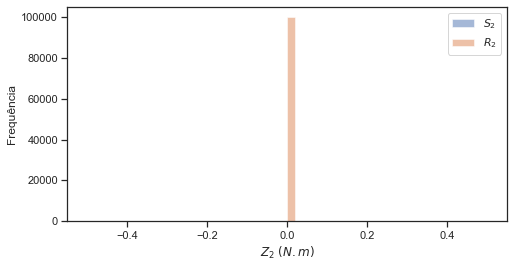

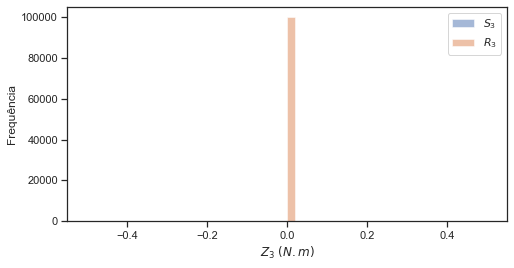

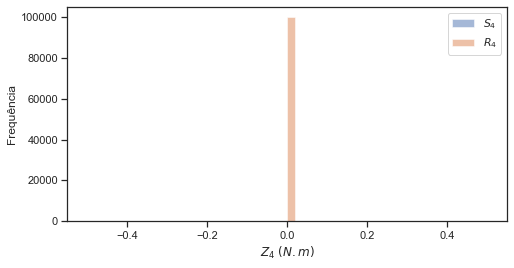

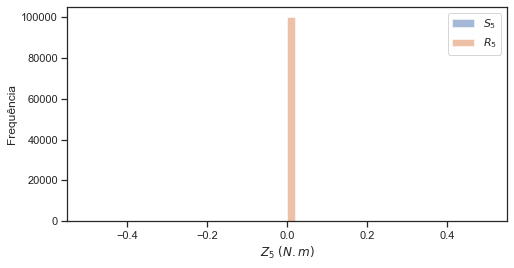

In [34]:
#Representação dos histogramas de frequência de S_0 e R_0 na região de interferência.
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
alfa = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
#'NAME': '5P SEM ISE I_4 T4',
for c, v in enumerate(lista):
    OPCOES_GRAFICAS = {'NAME': '5P COM ISE I_'+str(v-1)+' T4 - BARRA '+str(alfa[c])+'',
                        'EXTENSION': '.jpeg',
                        'DPI': 600,
                        'WIDTH': 0.20,
                        'HEIGHT': 0.10,
                        'X DATA': '$S_'+str(alfa[c])+'$',
                        'Y DATA': '$R_'+str(alfa[c])+'$',
                        'X AXIS SIZE': 20,
                        'Y AXIS SIZE': 20,
                        'AXISES COLOR': '#00000',
                        'X AXIS LABEL': '$Z_'+str(alfa[c])+'$ $(N.m)$',
                        'Y AXIS LABEL': 'Frequência',
                        'LABELS SIZE': 16,
                        'LABELS COLOR': '#000000',
                        'C VALUE': 'G_'+str(v)+'',
                        'TRANSPARENCY': 0.8,
                        'COLOR MAP': 'viridis',
                        'BINS': '50',
                        'ALPHA': '0.5'}
    # RESULTS
    OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_'+str(v-1)+'', 'Y DATA': 'S_'+str(v-1)+'', 'G VALUE': 'G_'+str(v-1)+''}  

    # CALL PLOT
    RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Probabilidade de Falha',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'beta'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
RESULTS_TEST